In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as random

sns.set_style('darkgrid')
#sns.set_palette(sns.color_palette("viridis"))

In [2]:
def plot_pair_metrics(n, x, y, title, y_axis):
    df = pd.DataFrame({
        'No of groups': x,
        y_axis: y,
        'Clients': n
    })
    if np.mean(y)<1:
        ax = sns.lineplot(
            data=df, x='No of groups', y=y_axis, hue='Clients', estimator=None, linewidth=4
        ).set(title=title)
    else:
        y = np.where(y >=40, 41, y)
        df = pd.DataFrame({
        'No of groups': x,
        y_axis: y,
        'Clients': n
        })
        ax = sns.lineplot(
            data=df, x='No of groups', y=y_axis, hue='Clients', estimator=None, linewidth=4
        ).set(title=title)

    plt.title(title)
    plt.xticks(x)
    plt.legend(loc='lower right', title='Total number of clients')
    plt.show()

def pair_wise_post_process(acc, no_grps_list, total_clients, global_rounds, cutoffs):
    accuracy_end = [max(acc[i]) for i in acc]
    plt.ylim(0, 1)
    plot_pair_metrics([total_clients]*len(no_grps_list), no_grps_list, accuracy_end, f"Accuracy after {global_rounds} rounds", "Accuracy")
    metrics_rounds_85 = np.zeros(len(no_grps_list))
    metrics_rounds_75 = np.zeros(len(no_grps_list))
    for j in cutoffs:
        metrics_rounds_75 = np.zeros(len(no_grps_list))
        for i in range(len(acc)):
            if len(np.argwhere(np.array(acc[i])>=j)) > 0:
                metrics_rounds_75[i] = np.argwhere(np.array(acc[i])>=j)[0][0]
            else:
                metrics_rounds_75[i] = 99
    
        plt.ylim(0, 50)
        plot_pair_metrics([total_clients]*len(no_grps_list), no_grps_list, metrics_rounds_75, f"Rounds to reach {j*100}% accuracy", "Rounds")

In [3]:
dict_results = {}

for i in [100, 250, 500, 1000]:
    dict_results[i] = np.load(f"./results/{i}.npy", allow_pickle=True)[()]
    #pair_wise_post_process(dict_results[i], [1, 2, 5, 10], i, 40, [0.80, 0.75])

In [4]:
dict_fraud = {}

for i in [50, 100, 250, 350]:
    dict_fraud[i] = np.load(f"./fraud/{i}.npy", allow_pickle=True)[()]
    #pair_wise_post_process(dict_fraud[i], [1, 2, 5, 10], i, 40, [0.75, 0.70])

In [5]:
def get_metrics(acc, cutoffs, group_sizes=[1, 2, 5, 10]):
    ret = {}
    ret['peers'] = []
    ret['group_size'] = []
    ret['max_accuracy'] = []
    
    for cutoff in cutoffs:
        ret[f'rounds_to_{int(cutoff*100)}_accuracy'] = []

    for x in acc:
        for y in acc[x]:
            arr = acc[x][y]
            ret['peers'].append(x)
            ret['group_size'].append(group_sizes[y])
            ret['max_accuracy'].append(max(arr))

            for i, cutoff in enumerate(cutoffs):
                val = None
                for j, val in enumerate(arr):
                    if val >= cutoff:
                        val = j
                        break
                ret[f'rounds_to_{int(cutoff*100)}_accuracy'].append(val)

    return pd.DataFrame(ret)

In [6]:
df_covid = get_metrics(dict_results, [0.75, 0.8])
df_covid

,peers,group_size,max_accuracy,rounds_to_75_accuracy,rounds_to_80_accuracy
0,100,1,0.8255,30.0000,32.0000
1,100,2,0.8284,24.0000,27.0000
2,100,5,0.8335,29.0000,32.0000
3,100,10,0.8266,26.0000,28.0000
4,250,1,0.8382,29.0000,29.0000
5,250,2,0.8320,26.0000,26.0000
6,250,5,0.8327,26.0000,27.0000
7,250,10,0.8360,27.0000,27.0000
8,500,1,0.8143,22.0000,22.0000
9,500,2,0.8168,23.0000,29.0000


Text(0.5, 1.0, 'Max accuracy on Covid dataset after 40 epochs')

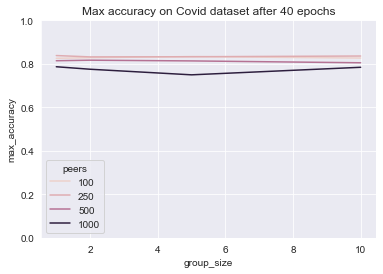

In [7]:
sns.lineplot(data=df_covid, x="group_size", y="max_accuracy", hue="peers")
plt.ylim(0, 1)
plt.title("Max accuracy on Covid dataset after 40 epochs")

Text(0.5, 1.0, 'Rounds to reach 75% accuracy on Covid dataset')

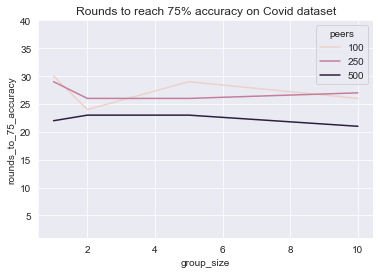

In [8]:
sns.lineplot(data=df_covid[df_covid['peers'] != 1000], x="group_size", y="rounds_to_75_accuracy", hue="peers")
plt.ylim(1, 40)
plt.title("Rounds to reach 75% accuracy on Covid dataset")

Text(0.5, 1.0, 'Rounds to reach 80% accuracy on Covid dataset')

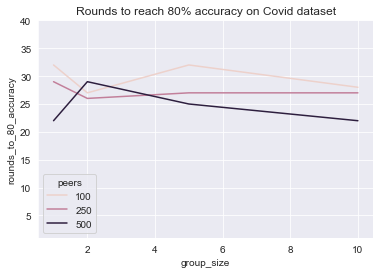

In [9]:
sns.lineplot(data=df_covid[df_covid['peers'] != 1000], x="group_size", y="rounds_to_80_accuracy", hue="peers")
plt.ylim(1, 40)
plt.title("Rounds to reach 80% accuracy on Covid dataset")

In [10]:
df_fraud = get_metrics(dict_fraud, [0.75, 0.8])
df_fraud

,peers,group_size,max_accuracy,rounds_to_75_accuracy,rounds_to_80_accuracy
0,50,1,0.8276,14.0000,15.0000
1,50,2,0.8522,13.0000,14.0000
2,50,5,0.8374,13.0000,16.0000
3,50,10,0.8621,13.0000,14.0000
4,100,1,0.8818,6.0000,7.0000
5,100,2,0.8719,7.0000,8.0000
6,100,5,0.8818,6.0000,7.0000
7,100,10,0.8768,6.0000,7.0000
8,250,1,0.4483,0.2562,0.2562
9,250,2,0.4286,0.2463,0.2463


Text(0.5, 1.0, 'Max accuracy on Fraud dataset after 40 epochs')

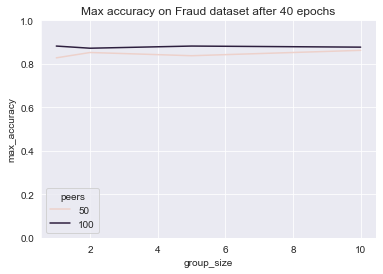

In [11]:
sns.lineplot(data=df_fraud[df_fraud['peers'] < 240], x="group_size", y="max_accuracy", hue="peers")
plt.ylim(0, 1)
plt.title("Max accuracy on Fraud dataset after 40 epochs")

Text(0.5, 1.0, 'Rounds to reach 75% accuracy on Covid dataset')

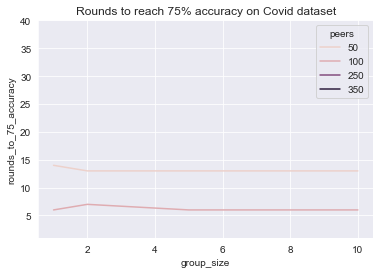

In [12]:
sns.lineplot(data=df_fraud[df_fraud['peers'] != 1000], x="group_size", y="rounds_to_75_accuracy", hue="peers")
plt.ylim(1, 40)
plt.title("Rounds to reach 75% accuracy on Covid dataset")

Text(0.5, 1.0, 'Rounds to reach 80% accuracy on Covid dataset')

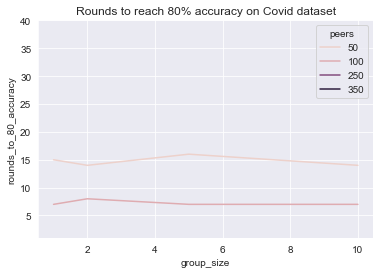

In [13]:
sns.lineplot(data=df_fraud[df_fraud['peers'] != 1000], x="group_size", y="rounds_to_80_accuracy", hue="peers")
plt.ylim(1, 40)
plt.title("Rounds to reach 80% accuracy on Covid dataset")